In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class LMSFilter(object):

    def __init__(
        self,
        n,
        lr=1E-2,
        w='random'
    ):

        self.n = n
        self.lr = lr
        self.w = self.init_weights(w)

    def init_weights(self, w):
        """ Initialize filter coefficients """
        if isinstance(w, str):
            if w == 'random':
                w = np.random.normal(0, 0.5, self.n)
            elif w == 'zeros':
                w = np.zeros(self.n)
            else:
                raise ValueError('Unknown weight initialization type')

        return w

    def predict(self, x):
        """ Predict output y given input x and weights w """
        return np.dot(self.w, x)
    
    def fit(self, x, y):
        """ Fit the filter """

        x, y = np.array(x), np.array(y)
        assert x.shape[0] == y.shape[0], "x and y must have the same number of samples (dim 0)"

        N = x.shape[0]
        y_hat, e = np.zeros(N), np.zeros(N)

        print('Fitting LMS Filter')
        for i in tqdm(range(N)):
            # Predict
            y_hat[i] = self.predict(x[i])

            # Compute error
            e[i] = y[i] - y_hat[i]

            # Compute gradient
            dw = self.lr * e[i] * x[i]

            # Update weights
            self.w = self.w + dw
            
        return y_hat, e


# Problem (1)

In [5]:
N = 1000
x = np.random.normal(loc=0.0, scale=1.0, size=(N, 4))
z = np.random.normal(loc=0.0, scale=0.1, size=N) # noise
y = 1.0*x[:,0] + 0.5*x[:,1] + 0.25*x[:,2] + 0.1*x[:,3] + z # target

filter = LMSFilter(n=4, lr=1E-2, w='random')
y_hat, e = filter.fit(x, y)

100%|██████████| 1000/1000 [00:00<00:00, 155962.67it/s]

Fitting LMS Filter


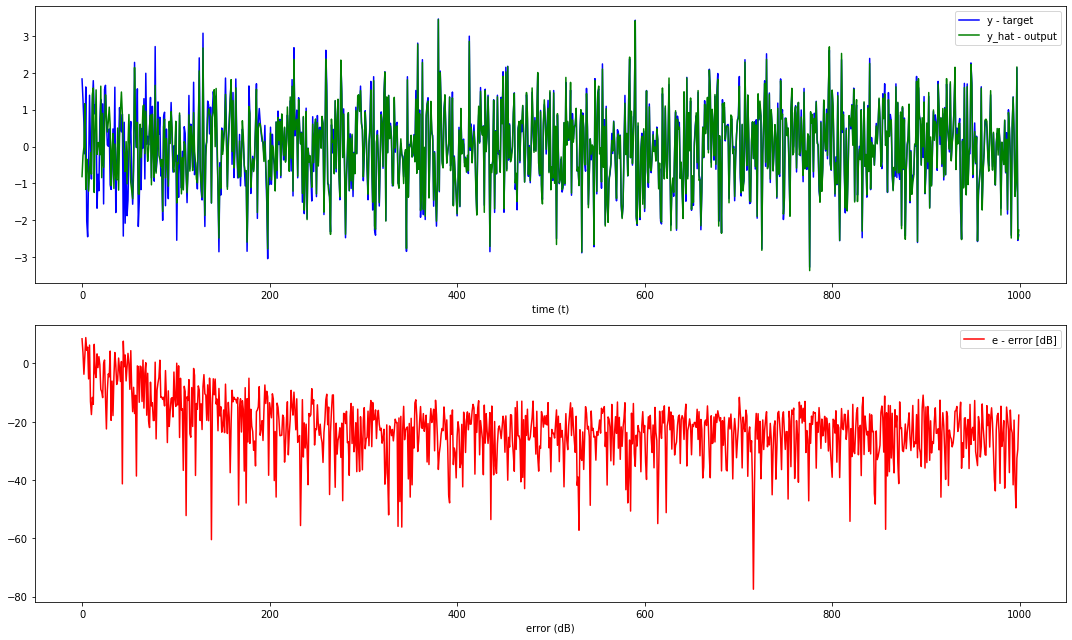

In [7]:
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.xlabel("time (t)")
plt.plot(y, "b", label="y - target")
plt.plot(y_hat,"g", label="y_hat - output")
plt.legend()
plt.subplot(212)
plt.xlabel("time (t)")
plt.xlabel("error (dB)")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
plt.legend()
plt.tight_layout()
plt.show()

# Problem (2)

In [8]:
N = 1000
x = np.random.normal(loc=0.0, scale=1.0, size=(N, 4))
z = np.random.normal(loc=0.0, scale=0.1, size=N) # noise
y = 0.05*x[:,0] + 0.1*x[:,1] + 1.0*x[:,2] + 0.25*x[:,3] + z # target

filter = LMSFilter(n=4, lr=1E-2, w='random')
y_hat, e = filter.fit(x, y)

100%|██████████| 1000/1000 [00:00<00:00, 129890.81it/s]

Fitting LMS Filter


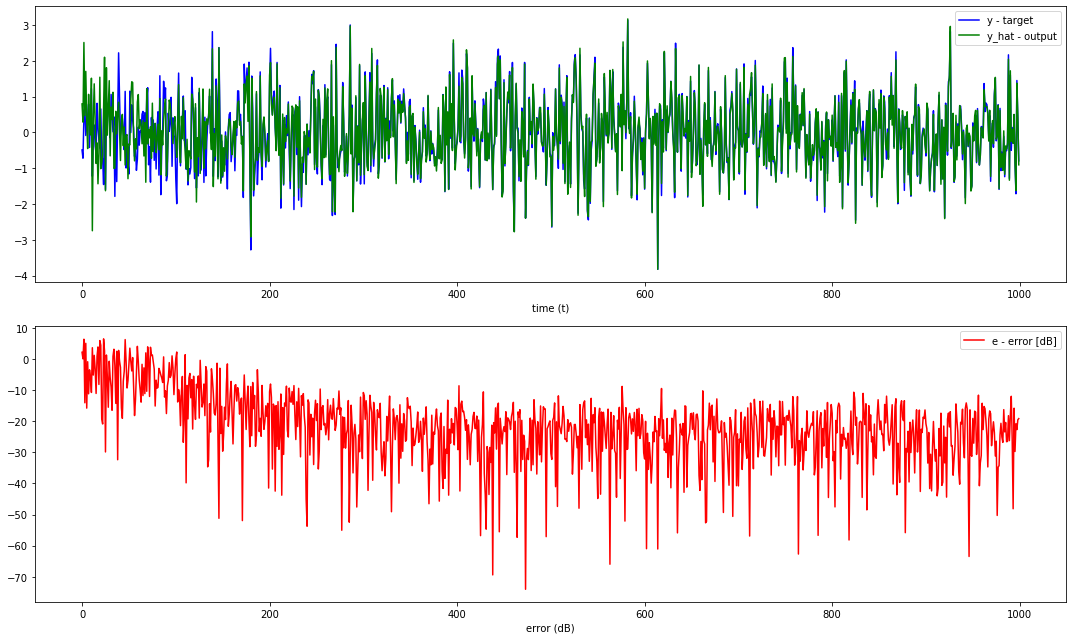

In [9]:
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.xlabel("time (t)")
plt.plot(y, "b", label="y - target")
plt.plot(y_hat,"g", label="y_hat - output")
plt.legend()
plt.subplot(212)
plt.xlabel("time (t)")
plt.xlabel("error (dB)")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
plt.legend()
plt.tight_layout()
plt.show()